In [1]:
import sys
import pandas as pd

sys.path.append('../')

import main

2022-06-22 19:39:54.850799: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-22 19:39:54.850826: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
DATA_FILEPATH = '../data/product_sentiment.csv'

# Binary Model

In [3]:
model_type = 'binary'

In [4]:
df = pd.read_csv(DATA_FILEPATH)

In [5]:
## PREPROCESS DATA (MINOR)

## Remove unknown sentiments
df_unk_removed = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

## Polarity analysis?
if model_type == 'binary':
    df_unk_removed = df_unk_removed[df_unk_removed['is_there_an_emotion_directed_at_a_brand_or_product'] != "No emotion toward brand or product"]

## Convert NANs to UNK
df_unk_removed.loc[:,'emotion_in_tweet_is_directed_at'] = df_unk_removed['emotion_in_tweet_is_directed_at'].apply(lambda x: 'UNK' if x != x else x)

## Drop NANs
df_input = df_unk_removed.dropna(subset=['tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product', 'emotion_in_tweet_is_directed_at'])

Positive emotion    2367
Negative emotion    2367
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64
Epoch 1/30


2022-06-22 19:39:01.027180: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-22 19:39:01.027197: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-22 19:39:01.027211: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (J-Proteus): /proc/driver/nvidia/version does not exist
2022-06-22 19:39:01.027386: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


126/134 [===========================>..] - ETA: 0s - loss: 0.6485 - categorical_accuracy: 0.6796
Epoch 1: val_categorical_accuracy improved from -inf to 0.85232, saving model to ../prediction/models/model_binary.h5
134/134 [==============================] - 2s 8ms/step - loss: 0.6430 - categorical_accuracy: 0.6885 - val_loss: 0.5236 - val_categorical_accuracy: 0.8523
Epoch 2/30
128/134 [===========================>..] - ETA: 0s - loss: 0.3444 - categorical_accuracy: 0.9329
Epoch 2: val_categorical_accuracy improved from 0.85232 to 0.94304, saving model to ../prediction/models/model_binary.h5
134/134 [==============================] - 1s 7ms/step - loss: 0.3402 - categorical_accuracy: 0.9336 - val_loss: 0.2530 - val_categorical_accuracy: 0.9430
Epoch 3/30
130/134 [============================>.] - ETA: 0s - loss: 0.1348 - categorical_accuracy: 0.9832
Epoch 3: val_categorical_accuracy improved from 0.94304 to 0.97468, saving model to ../prediction/models/model_binary.h5
134/134 [========

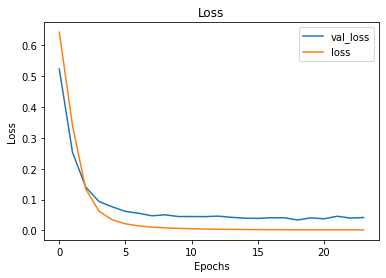

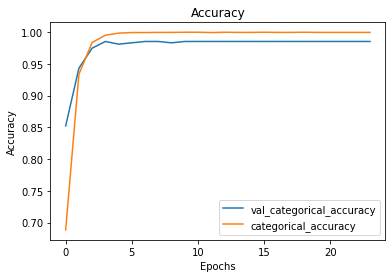

In [6]:
## Build, train and validate model ()
main.train_validate_model(df_input, model_type=model_type)

In [7]:
## PREDICTION
sentences = [
    '#mobilephotography #iphone Shot and edited with IPhone_ XS max 📸✨📲',
    'Crazy how fast something can grow in 11 years! 🍎 #iphone #iOS16',
    'Well, here is an interesting glitch. 😂 Look at my time, WiFi, battery and cellular indicators. 🤣. That ain’t right.#Apple #iPhone #iOS',
    'Completely agree. My #iphone XR (3 years old) now takes 2 to 3 times longer to open basic apps such as the camera for no apparent reason.',
    'This is real sh*t, it’s been 8 hrs since i got this notification.(phone is waterproof though) And I can\'t charge my phone. And battery is draining like fountain even though i\'m not using it. Really frustated!!!' 
]

results = main.predict(sentences, model_type=model_type)
for result in results:
    print(results[result]['sentence'])
    print(results[result]['max_prediction'])
    print(results[result]['result'])
    print('')
    

binary
model_binary
1/1 [==============================] - 0s 12ms/step
#mobilephotography #iphone Shot and edited with IPhone_ XS max 📸✨📲
Positive emotion
[(0.2280984, 'Negative emotion'), (0.7719016, 'Positive emotion')]

Crazy how fast something can grow in 11 years! 🍎 #iphone #iOS16
Negative emotion
[(0.7840333, 'Negative emotion'), (0.21596676, 'Positive emotion')]

Well, here is an interesting glitch. 😂 Look at my time, WiFi, battery and cellular indicators. 🤣. That ain’t right.#Apple #iPhone #iOS
Positive emotion
[(0.4368623, 'Negative emotion'), (0.56313765, 'Positive emotion')]

Completely agree. My #iphone XR (3 years old) now takes 2 to 3 times longer to open basic apps such as the camera for no apparent reason.
Positive emotion
[(0.37012312, 'Negative emotion'), (0.62987685, 'Positive emotion')]

This is real sh*t, it’s been 8 hrs since i got this notification.(phone is waterproof though) And I can't charge my phone. And battery is draining like fountain even though i'm not

# Multiclass Model

In [3]:
model_type = 'multiclass'

In [4]:
df = pd.read_csv(DATA_FILEPATH)

In [5]:
## PREPROCESS DATA (MINOR)

## Remove unknown sentiments
df_unk_removed = df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

## Polarity analysis?
if model_type == 'binary':
    df_unk_removed = df_unk_removed[df_unk_removed['is_there_an_emotion_directed_at_a_brand_or_product'] != "No emotion toward brand or product"]

## Convert NANs to UNK
df_unk_removed.loc[:,'emotion_in_tweet_is_directed_at'] = df_unk_removed['emotion_in_tweet_is_directed_at'].apply(lambda x: 'UNK' if x != x else x)

## Drop NANs
df_input = df_unk_removed.dropna(subset=['tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product', 'emotion_in_tweet_is_directed_at'])

/tmp/ipykernel_63254/3306780637.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unk_removed.loc[:,'emotion_in_tweet_is_directed_at'] = df_unk_removed['emotion_in_tweet_is_directed_at'].apply(lambda x: 'UNK' if x != x else x)


Positive emotion                      4295
No emotion toward brand or product    4295
Negative emotion                      4295
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64


2022-06-22 19:40:17.030678: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-22 19:40:17.030695: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-22 19:40:17.030708: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (J-Proteus): /proc/driver/nvidia/version does not exist
2022-06-22 19:40:17.030858: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
363/363 [==============================] - ETA: 0s - loss: 0.8256 - categorical_accuracy: 0.6340
Epoch 1: val_categorical_accuracy improved from -inf to 0.78588, saving model to ../prediction/models/model_multiclass.h5
363/363 [==============================] - 3s 7ms/step - loss: 0.8256 - categorical_accuracy: 0.6340 - val_loss: 0.5287 - val_categorical_accuracy: 0.7859
Epoch 2/30
357/363 [============================>.] - ETA: 0s - loss: 0.3722 - categorical_accuracy: 0.8656
Epoch 2: val_categorical_accuracy improved from 0.78588 to 0.84639, saving model to ../prediction/models/model_multiclass.h5
363/363 [==============================] - 2s 6ms/step - loss: 0.3712 - categorical_accuracy: 0.8662 - val_loss: 0.3694 - val_categorical_accuracy: 0.8464
Epoch 3/30
363/363 [==============================] - ETA: 0s - loss: 0.2162 - categorical_accuracy: 0.9283
Epoch 3: val_categorical_accuracy improved from 0.84639 to 0.84872, saving model to ../prediction/models/model_multicla

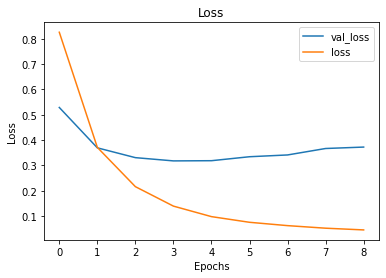

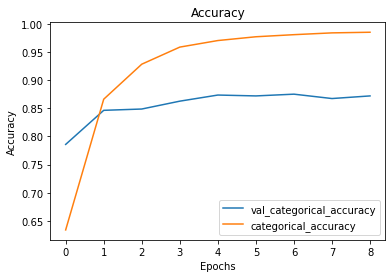

In [6]:
## Build, train and validate model ()
main.train_validate_model(df_input, model_type=model_type)

In [7]:
## PREDICTION
sentences = [
    '#mobilephotography #iphone Shot and edited with IPhone_ XS max 📸✨📲',
    'Crazy how fast something can grow in 11 years! 🍎 #iphone #iOS16',
    'Well, here is an interesting glitch. 😂 Look at my time, WiFi, battery and cellular indicators. 🤣. That ain’t right.#Apple #iPhone #iOS',
    'Completely agree. My #iphone XR (3 years old) now takes 2 to 3 times longer to open basic apps such as the camera for no apparent reason.',
    'This is real sh*t, it’s been 8 hrs since i got this notification.(phone is waterproof though) And I can\'t charge my phone. And battery is draining like fountain even though i\'m not using it. Really frustated!!!' 
]

results = main.predict(sentences, model_type=model_type)
for result in results:
    print(results[result]['sentence'])
    print(results[result]['max_prediction'])
    print(results[result]['result'])
    print('')

multiclass
model_multiclass
1/1 [==============================] - 0s 12ms/step
#mobilephotography #iphone Shot and edited with IPhone_ XS max 📸✨📲
No emotion toward brand or product
[(0.018465541, 'Negative emotion'), (0.9464278, 'No emotion toward brand or product'), (0.035106674, 'Positive emotion')]

Crazy how fast something can grow in 11 years! 🍎 #iphone #iOS16
No emotion toward brand or product
[(0.002792615, 'Negative emotion'), (0.99559, 'No emotion toward brand or product'), (0.0016174287, 'Positive emotion')]

Well, here is an interesting glitch. 😂 Look at my time, WiFi, battery and cellular indicators. 🤣. That ain’t right.#Apple #iPhone #iOS
Negative emotion
[(0.50136286, 'Negative emotion'), (0.1653618, 'No emotion toward brand or product'), (0.33327535, 'Positive emotion')]

Completely agree. My #iphone XR (3 years old) now takes 2 to 3 times longer to open basic apps such as the camera for no apparent reason.
No emotion toward brand or product
[(0.0817627, 'Negative emoti